## LDA-analysis
Here we import our LDA_model and initialize it using our dataset. 

In [2]:
# !python -m spacy download nb_core_news_md # Uncomment to download Norsk Bokmål language package.

In [1]:
import sys
sys.path.append('..')

In [2]:
from models.LDA import LDA, plot_topic_distribution, plot_coherence_scores
import pandas as pd

dataframe = pd.read_csv('../../dataset/nou_hearings.csv')
texts = dataframe.text.tolist()
lda = LDA(data=texts, no_below=5, no_above=0.5, language='/Users/nicolaisivesind/miniconda3/lib/python3.11/site-packages/nb_core_news_md/nb_core_news_md-3.7.0')

### Estimate optimal number of topics

In [5]:
coherence_values, model_list, topic_range, passes = lda.calculate_lda_model_coherences(topic_interval=(2, 25), passes=500)

plot_coherence_scores(topic_range=topic_range, coherence_values=coherence_values, passes=passes)
# plot_coherence_scores(topic_range=topic_range, coherence_values=coherence_values, passes=passes, savefig='../../plots/LDA_coherence-Large')

Building LDA-models:   0%|          | 0/24 [00:00<?, ?it/s]

: 

### Select optimal model

In [ ]:
best_model = model_list[coherence_values.index(max(coherence_values))]
selected_model = best_model

In [ ]:
# Save model
selected_model.save('../models/LDA_model')

In [3]:
# Load model
from gensim.models.ldamodel import LdaModel
selected_model = LdaModel.load('../model_instance/topics_18/LDA-model_18')

### Print topics

In [4]:
topics = selected_model.print_topics(num_words=10)
sorted_topics = sorted(topics, key=lambda x: x[0])
for topic in sorted_topics:
    print(topic)

(0, '0.021*"krav" + 0.020*"støtte" + 0.017*"virkemiddel" + 0.016*"burde" + 0.014*"utvalg" + 0.011*"bruk" + 0.011*"vurdere" + 0.010*"sirkulær" + 0.010*"derfor" + 0.009*"bygg"')
(1, '0.017*"natur" + 0.011*"tap" + 0.011*"øke" + 0.010*"utvalg" + 0.010*"burde" + 0.009*"klimagassutslipp" + 0.009*"økosystem" + 0.009*"viktig" + 0.009*"sammenheng" + 0.008*"areale"')
(2, '0.018*"energi" + 0.014*"fornybar" + 0.012*"norge" + 0.010*"stor" + 0.010*"bruk" + 0.010*"øke" + 0.010*"liten" + 0.009*"behov" + 0.009*"infrastruktur" + 0.009*"mulig"')
(3, '0.017*"utvalg" + 0.015*"omstilling" + 0.012*"norge" + 0.012*"ta" + 0.011*"utslippskutt" + 0.009*"peke" + 0.009*"redusere" + 0.008*"endring" + 0.008*"lavutslippssamfunn" + 0.008*"frem"')
(4, '0.066*"omstilling" + 0.061*"nou" + 0.056*"klimapolitikk" + 0.054*"veivalg" + 0.052*"klimautvalget" + 0.051*"lavutslipp" + 0.036*"rapport" + 0.033*"innspill" + 0.022*"høring" + 0.020*"høringssvar"')
(5, '0.029*"gass" + 0.028*"petroleumsvirksomhet" + 0.024*"strategi" + 0.0

### Calculate text-topic pairs

In [5]:
predictions = lda.predict_topics(model=selected_model, relevancy=False)

dataframe['topic_predictions'] = predictions
dataframe.head(n=100)

,actor,text,date,label,topic_predictions
0,Abelia,Abelia er foreningen for kunnskaps- og teknolo...,30.01.2024,0,"{'topic': 12, 'confidence': 0.79}"
1,Abelia,Innledningsvis vil vi takke for det grundige o...,30.01.2024,0,"{'topic': 6, 'confidence': 0.46}"
2,Abelia,Vi er enig med utvalget i at klimapolitikken m...,30.01.2024,0,"{'topic': 16, 'confidence': 0.71}"
3,Abelia,Over de siste åtte årene har Abelia målt norsk...,30.01.2024,0,"{'topic': 2, 'confidence': 0.47}"
4,Abelia,Vi vil gjerne oppfordre til at det blir satt s...,30.01.2024,0,"{'topic': 1, 'confidence': 0.78}"
...,...,...,...,...,...
95,Animalia AS,Bærekraftmål nr. 13 er å “handle umiddelbart f...,30.01.2024,2,"{'topic': 16, 'confidence': 0.36}"
96,Animalia AS,FAO avholdt sin 43. Generalkonferanse for mats...,30.01.2024,2,"{'topic': 12, 'confidence': 0.33}"
97,Animalia AS,Den første FAO initierte kongressen om bærekra...,30.01.2024,2,"{'topic': 7, 'confidence': 0.34}"
98,Animalia AS,I Parisavtalens fortale heter det: “Partene i ...,30.01.2024,2,"{'topic': 17, 'confidence': 0.54}"


## Plot distributions

{'Interessegruppe': 0, 'Offentlig forvaltning': 1, 'Bedrift': 2, 'Privatperson': 3, 'Politisk parti': 4, 'Frivillig organisasjon': 5, 'Akademisk institusjon': 6}
{'Interessegruppe': 0, 'Offentlig forvaltning': 1, 'Bedrift': 2, 'Privatperson': 3, 'Politisk parti': 4, 'Frivillig organisasjon': 5, 'Akademisk institusjon': 6}
{'Interessegruppe': 0, 'Offentlig forvaltning': 1, 'Bedrift': 2, 'Privatperson': 3, 'Politisk parti': 4, 'Frivillig organisasjon': 5, 'Akademisk institusjon': 6}
{'Interessegruppe': 0, 'Offentlig forvaltning': 1, 'Bedrift': 2, 'Privatperson': 3, 'Politisk parti': 4, 'Frivillig organisasjon': 5, 'Akademisk institusjon': 6}
{'Interessegruppe': 0, 'Offentlig forvaltning': 1, 'Bedrift': 2, 'Privatperson': 3, 'Politisk parti': 4, 'Frivillig organisasjon': 5, 'Akademisk institusjon': 6}
{'Interessegruppe': 0, 'Offentlig forvaltning': 1, 'Bedrift': 2, 'Privatperson': 3, 'Politisk parti': 4, 'Frivillig organisasjon': 5, 'Akademisk institusjon': 6}
{'Interessegruppe': 0, 'Offe

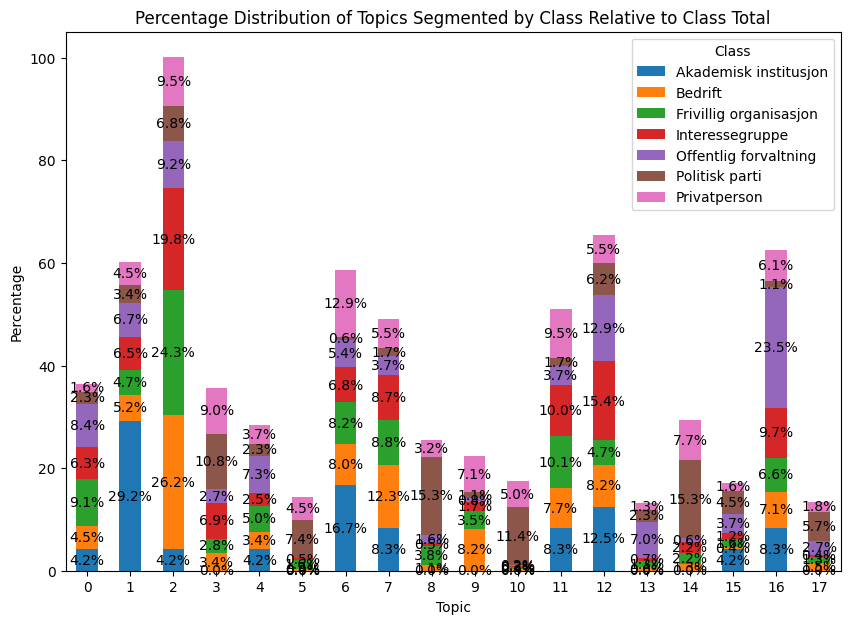

In [6]:
plot_topic_distribution(dataframe, savefig='LDA-Distribution-18')

### Extract arguments

In [8]:
arguments_df = lda.extract_arguments(dataframe, selected_model)
arguments_df.to_csv('../../dataset/LDA-Arguments.csv', index=False)

Processing Documents: 100%|██████████| 3048/3048 [12:18<00:00,  4.13it/s]
